In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [2]:
data = pd.read_csv('EEG_Eye_State.csv')

In [3]:
data2=data.drop("eyeDetection",axis=1)

In [4]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile and the third quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    iqr = q3 - q1
    # Calculating the thrshold
    threshold = 3 * iqr
    # Defining the lower and upper bounds
    lower_bound = q1 - threshold
    upper_bound = q3 + threshold
    # Filtering and returning the filtered data
    filtered_data = data[(data[column] >= lower_bound) &
                         (data[column] <= upper_bound)]
    return filtered_data


# Let's apply our previous method and save the new filtered data
for q in data2.columns:
    data2 = remove_outliers_iqr(data2, q)

# Taking a look at our filtered data
data2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [5]:
eeg_data = data2[['AF3']]
count=eeg_data.count(axis=0).values[0]
time_interval = round(117/count,5)

x_axis = np.linspace(0, 117,count)

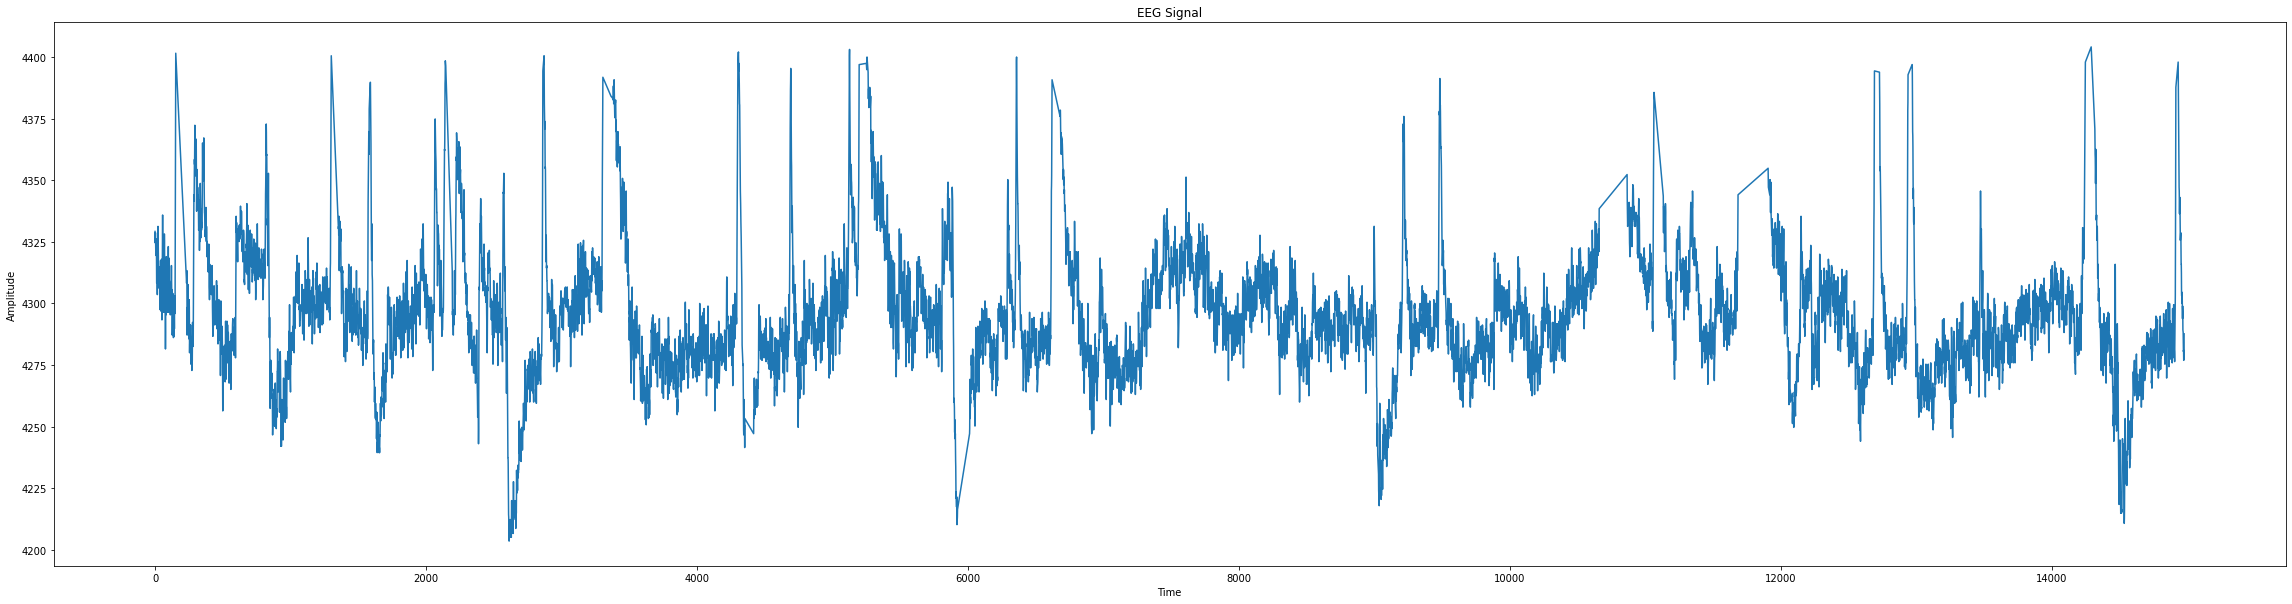

In [6]:
plt.figure(figsize=(40, 10))
plt.plot(eeg_data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()


In [7]:
from scipy.signal import butter, lfilter

count = eeg_data.count(axis=0).values[0]
total_interval= 117

sample_period = total_interval/count

f_sample = 1/sample_period





# Define a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Apply bandpass filter to EEG data
eeg_data_filtered = bandpass_filter(eeg_data, 3, 20,f_sample, 3)

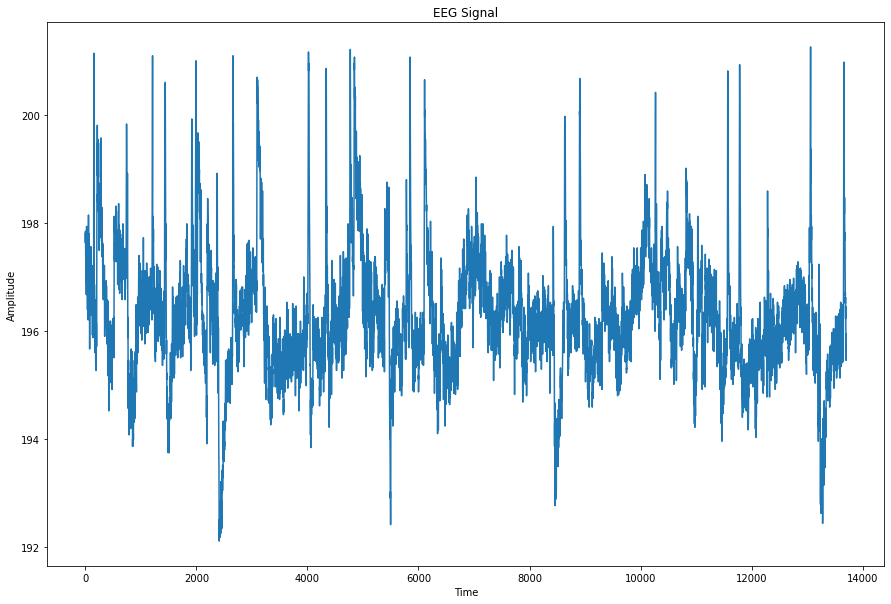

In [8]:

plt.figure(figsize=(15, 10))
plt.plot(eeg_data_filtered)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()


In [9]:
data2.to_csv('EEG_TO_FILTER.csv',index=False)

In [10]:
import numpy as np
import mne

# Load EEG data from CSV
eeg_data = np.genfromtxt('EEG_TO_FILTER.csv', delimiter=',')

# Define the sampling frequency (replace with your actual value)
sfreq = f_sample  # Replace with your actual sampling frequency

# Create an MNE-Python info object
info = mne.create_info(ch_names=['AF3', 'f7', 'F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4'], sfreq=sfreq, ch_types=['eeg'] * 14)

# Create an MNE-Python Raw object
raw = mne.io.RawArray(eeg_data.T, info)

raw.filter(l_freq=3, h_freq=20)



Creating RawArray with float64 data, n_channels=14, n_times=13708
    Range : 0 ... 13707 =      0.000 ...   117.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 195 samples (1.664 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


<RawArray | 14 x 13708 (117.0 s), ~1.5 MB, data loaded>

In [11]:
# raw.plot()

In [12]:
raw.save('filtered_eeg_data.fif', overwrite=True)

Writing e:\Engineering\Instru_repo\InstrumentsTask2\filtered_eeg_data.fif
Closing e:\Engineering\Instru_repo\InstrumentsTask2\filtered_eeg_data.fif
[done]


C:\Users\zezom\AppData\Local\Temp\ipykernel_31112\927871307.py:1: RuntimeWarning: This filename (e:\Engineering\Instru_repo\InstrumentsTask2\filtered_eeg_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save('filtered_eeg_data.fif', overwrite=True)


In [13]:
import mne
import pandas as pd

# Load the filtered FIF data
raw = mne.io.read_raw_fif('filtered_eeg_data.fif', preload=True)

# Get the data as a NumPy array
eeg_data = raw.get_data()

# Convert the data to a DataFrame for easier handling
eeg_df = pd.DataFrame(eeg_data.T, columns=raw.info['ch_names'])



Opening raw data file filtered_eeg_data.fif...
Isotrak not found
    Range : 0 ... 13707 =      0.000 ...   117.000 secs
Ready.
Reading 0 ... 13707  =      0.000 ...   117.000 secs...


C:\Users\zezom\AppData\Local\Temp\ipykernel_31112\3909548188.py:5: RuntimeWarning: This filename (filtered_eeg_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('filtered_eeg_data.fif', preload=True)


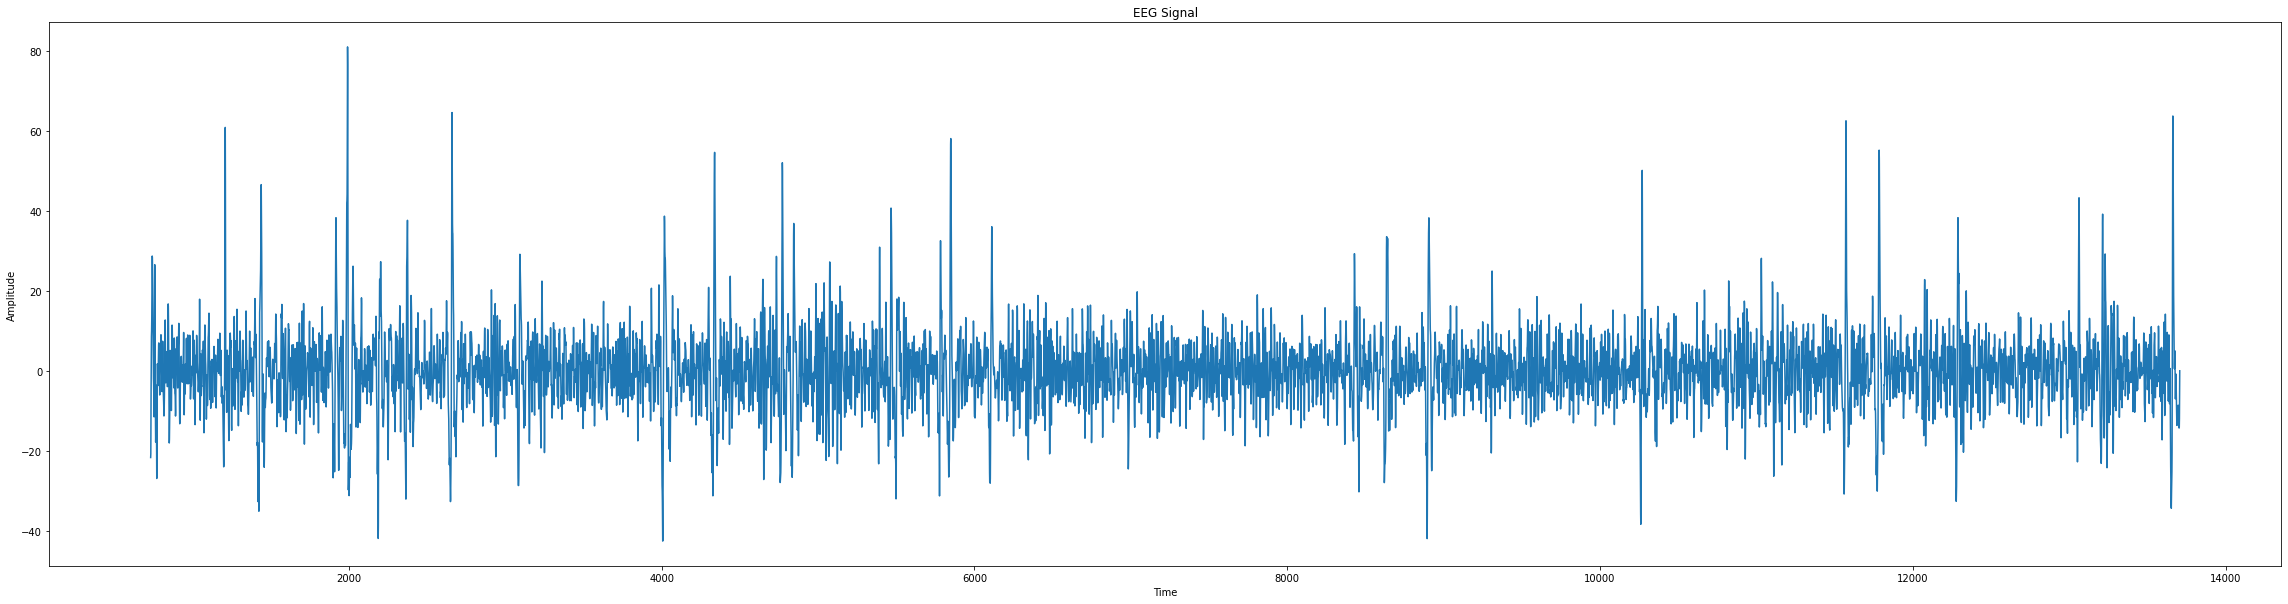

In [14]:


eeg_df=eeg_df.dropna()
eeg_df.to_csv('filteredSig.csv',index=False)

eeg_df.head()
eeg2=eeg_df[['AF3']]


plt.figure(figsize=(40, 10))
plt.plot(eeg2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()
